<a href="https://colab.research.google.com/github/MohammadErfanRashidi/Calories-Burnt/blob/main/CaloriesBurnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [65]:
# Uploading the dataset
dataset = pd.read_csv('/content/exercise.csv')

In [66]:
# Head
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [67]:
# Uploading calories dataset
calories_dataset = pd.read_csv('/content/calories.csv')

In [68]:
# Head
calories_dataset.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [69]:
# Adding Calories column to the dataset
dataset['Calories'] = calories_dataset['Calories']

In [70]:
# Head
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [71]:
# Shape
dataset.shape

(15000, 9)

In [72]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [73]:
# Missing values
dataset.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [74]:
# Describe
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [75]:
sns.set()

<ipython-input-76-6b4a7607e9ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

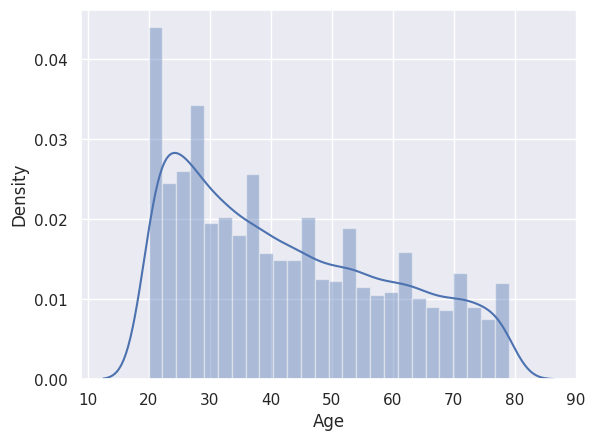

In [76]:
# Plotting Age
sns.distplot(dataset['Age'])

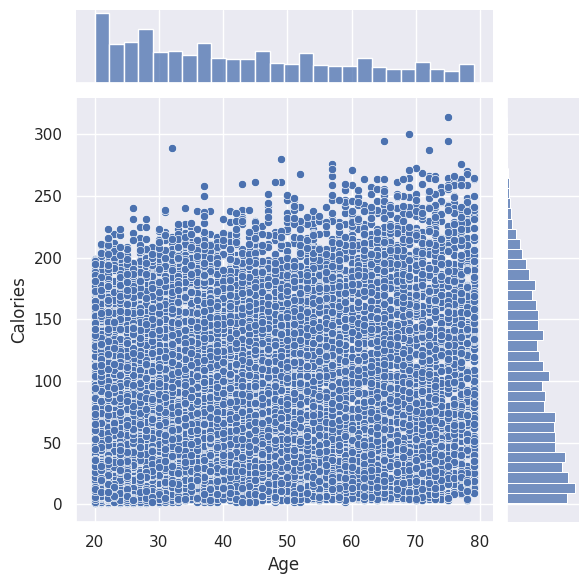

In [87]:
# Plotting Calories and Age
sns.jointplot(x='Age', y='Calories', data=dataset)

<ipython-input-77-225697eb7da4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

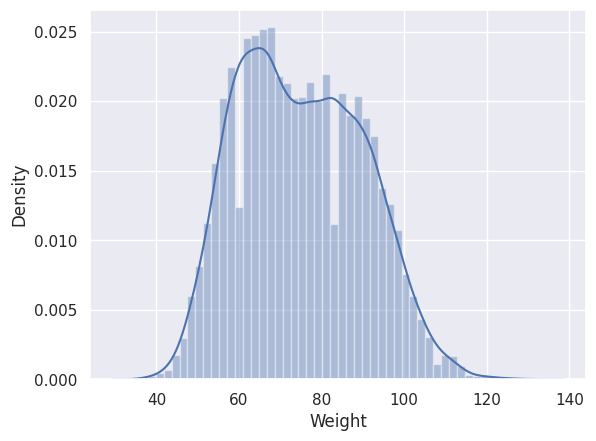

In [77]:
# Plotting Weight
sns.distplot(dataset['Weight'])

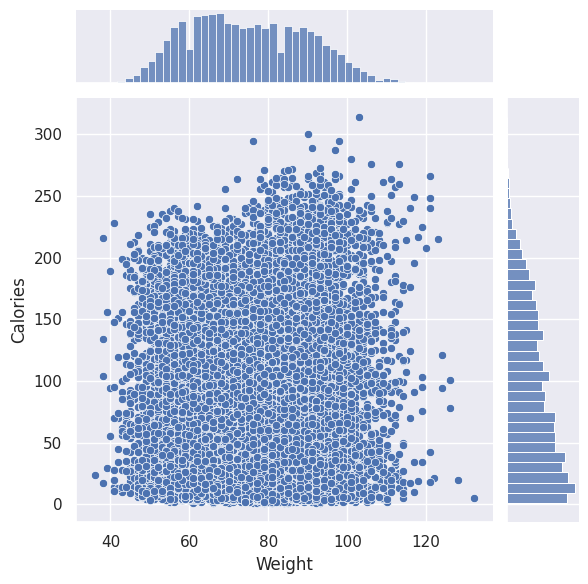

In [88]:
# Plotting Calories and Weight
sns.jointplot(x='Weight', y='Calories', data=dataset)

<ipython-input-78-1469a9ccd8f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

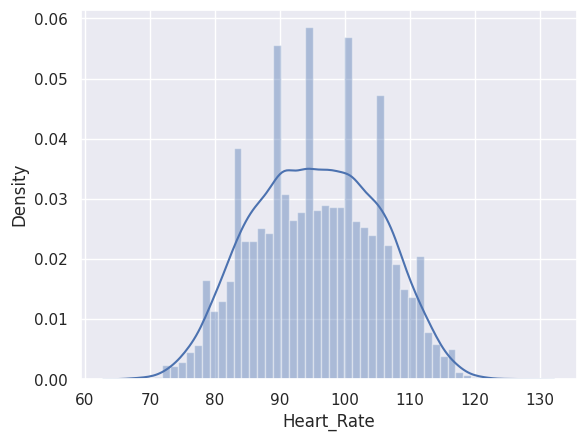

In [78]:
# Plotting Heart_Rate
sns.distplot(dataset['Heart_Rate'])

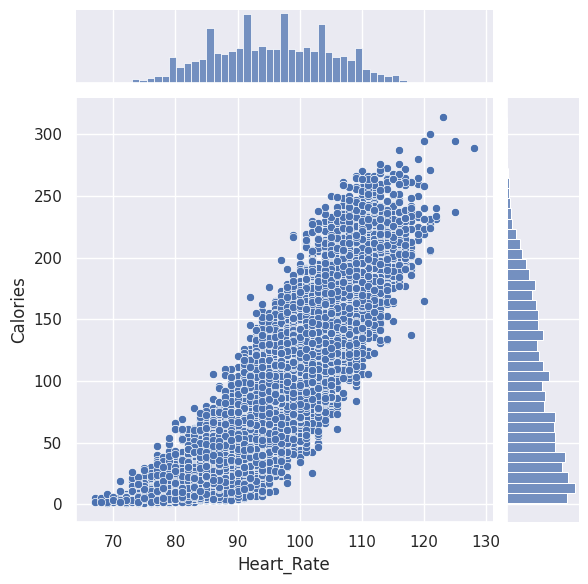

In [89]:
# Plotting Calories and Heart_Rate
sns.jointplot(x='Heart_Rate', y='Calories', data=dataset)

<ipython-input-91-57e214813d64>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

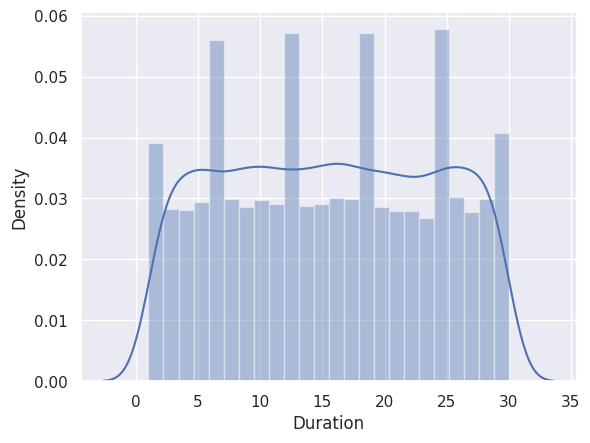

In [91]:
# Plotting Duration
sns.distplot(dataset['Duration'])

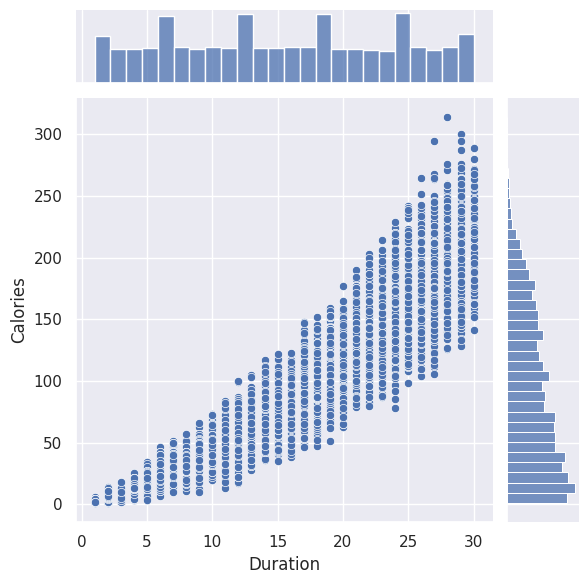

In [90]:
# Plotting Calories and Duration
sns.jointplot(x='Duration', y='Calories', data=dataset)

<Axes: xlabel='Gender', ylabel='count'>

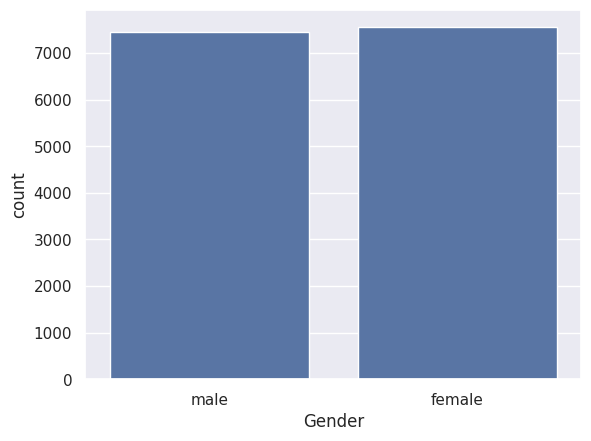

In [83]:
# Plotting Gender
sns.countplot(x='Gender', data=dataset)

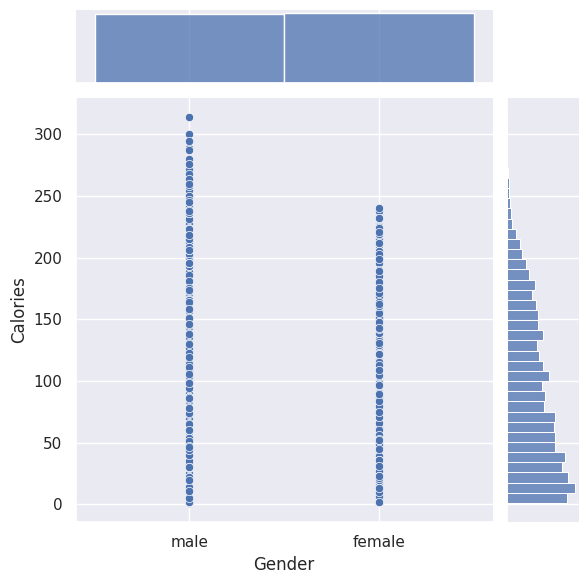

In [92]:
# Plotting Calories and Gender
sns.jointplot(x='Gender', y='Calories', data=dataset)

<ipython-input-99-73a904c070fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

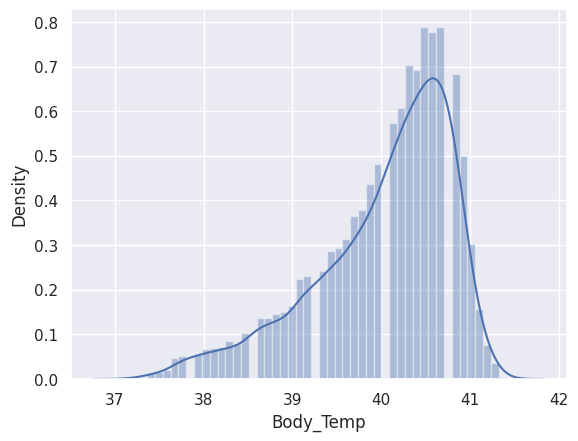

In [99]:
# PLotting Body_Temp
sns.distplot(dataset['Body_Temp'])

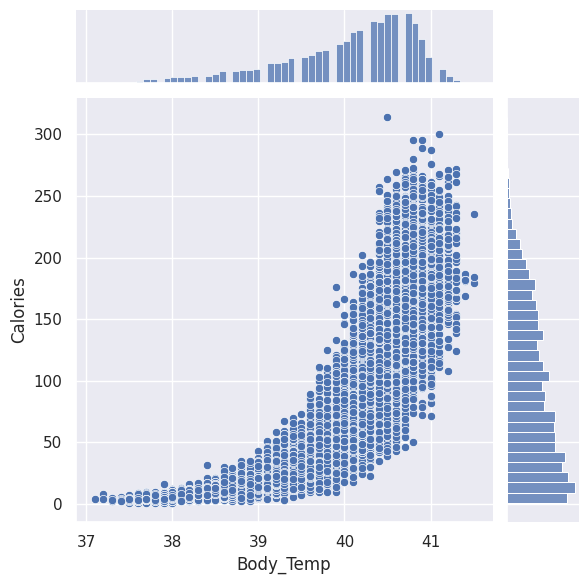

In [100]:
# Plotting Calories and Body_Temp
sns.jointplot(x='Body_Temp', y='Calories', data=dataset)

In [93]:
# Encoding Gender
dataset.replace({'Gender':{'male':0, 'female':1}}, inplace=True)

<ipython-input-93-16c3c6e3c359>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Gender':{'male':0, 'female':1}}, inplace=True)


In [94]:
# Head
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [95]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


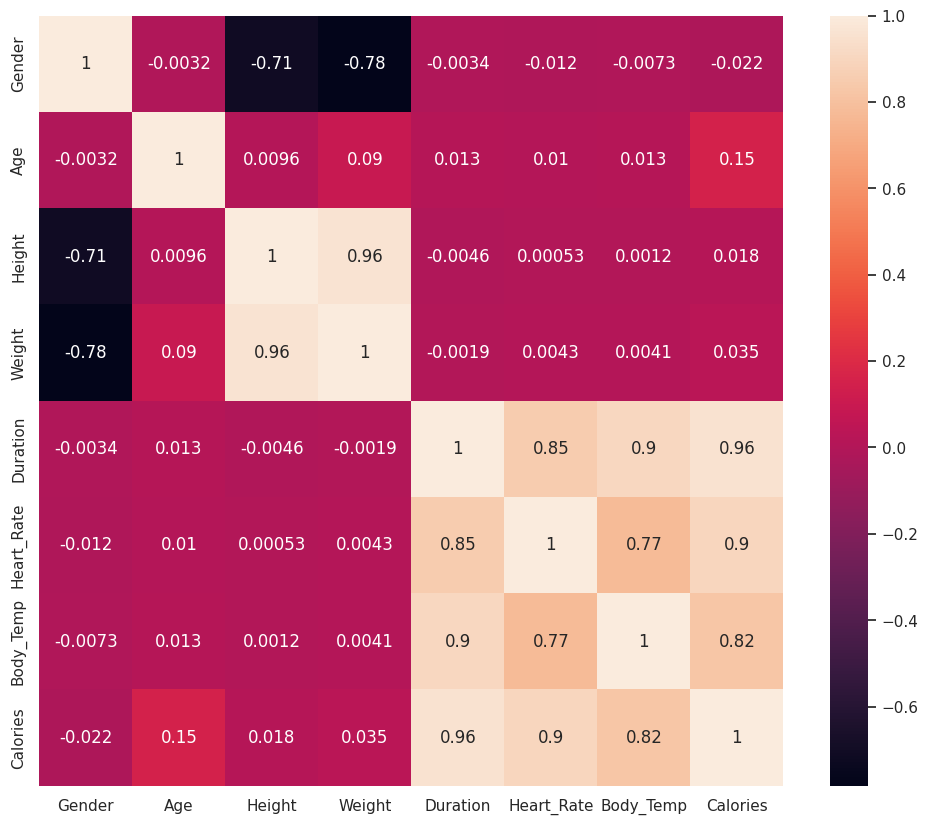

In [98]:
# Plotting the Heatmap

plt.figure(figsize=(12, 10))
heatmap_dataset = dataset.drop(['User_ID'], axis=1)
sns.heatmap(heatmap_dataset.corr(), annot=True)
plt.show()

In [101]:
# X and Y
X = dataset.drop(['User_ID', 'Calories'], axis=1)
Y = dataset['Calories']

In [103]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [104]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [106]:
# Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [107]:
# Shape
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [109]:
# RandomForestRegression
model = RandomForestRegressor()

In [110]:
# Fitting the model
model.fit(X_train, Y_train)

RandomForestRegressor()

In [114]:
# Score train
model.score(X_train, Y_train)

0.9996804569795038

In [115]:
# Score test
model.score(X_test, Y_test)

0.9981492622731051

In [113]:
# Predicting on the test data
Y_pred = model.predict(X_test)

# Evaluating the model using R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)
r2 = metrics.r2_score(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

R-squared: 0.9981492622731051
Mean Absolute Error: 1.7061100000000002
Root Mean Squared Error: 2.696112676923327


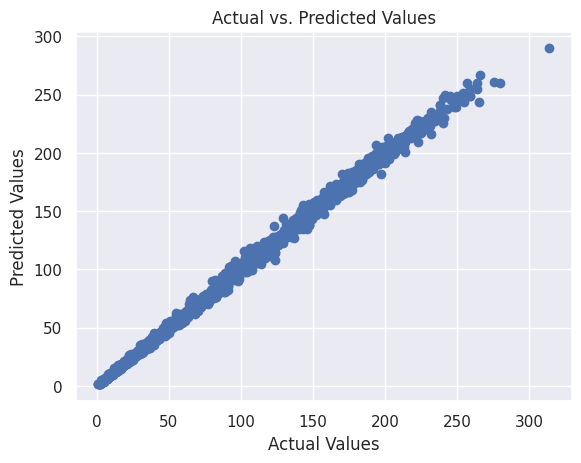

In [116]:
# Comparing the predicted values and actual values on plot
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

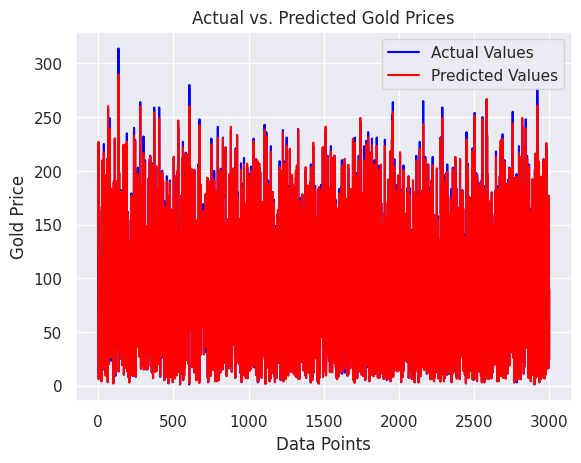

In [118]:
# Comparing the predicted values and actual values with separate plots
plt.plot(Y_test.values, label='Actual Values', color='blue')
plt.plot(Y_pred, label='Predicted Values', color='red')
plt.xlabel('Data Points')
plt.ylabel('Gold Price')
plt.title('Actual vs. Predicted Gold Prices')
plt.legend()
plt.show()